In [1]:
import pandas as pd

pd.options.display.max_columns = 999


train= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Train.csv', index_col=False)
test= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Test.csv', index_col=False)
val= pd.read_csv('C:/Users/mosto/REPOSITORY/Prediction_of_Insurance_Premium/data/Validation.csv', index_col=False)

print(train.shape)
print(test.shape)
print(val.shape)

(6210, 54)
(1827, 54)
(1097, 54)


In [2]:
y_train = train['Monthly Premium Auto']
y_test = test['Monthly Premium Auto']
y_val = val['Monthly Premium Auto']

In [3]:
y_train.shape

(6210,)

In [4]:
y_test.shape

(1827,)

In [5]:
y_val.shape

(1097,)

In [6]:
train.head()

,Washington,Arizona,Nevada,California,Oregon,Customer Lifetime Value,Response,Coverage,Education,Employed,Unemployed,Medical_Leave,Disabled,Retired,Female,Male,Income,Suburban,Rural,Urban,Married,Single,Divorced,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Corporate Auto,Personal Auto,Special Auto,Corporate L3,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Renew Offer Type,Agent,Call Center,Web,Branch,Total Claim Amount,Two Door,Four Door,SUV,Luxury SUV,Sports Car,Luxury Car,Vehicle Size,Activation_date
0,0,0,0,1,0,7659.72,No,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,73,22,93,0,2,0,1,0,0,0,0,0,0,0,1,0,0,Offer1,1,0,0,0,525.60,1,0,0,0,0,0,1,2011-02-06
1,0,0,0,1,0,4836.75,No,2,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,136,8,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,Offer1,0,0,0,1,979.20,0,0,1,0,0,0,1,2011-01-03
2,0,0,0,0,1,2648.47,No,1,1,0,0,0,1,0,1,0,26540,1,0,0,1,0,0,69,15,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,Offer2,0,0,0,1,378.43,0,1,0,0,0,0,2,2011-01-22
3,0,1,0,0,0,13575.68,No,1,2,1,0,0,0,0,1,0,48534,1,0,0,1,0,0,115,29,79,1,2,0,1,0,0,1,0,0,0,0,0,0,0,Offer4,0,1,0,0,552.00,0,0,1,0,0,0,1,2011-01-23
4,0,0,1,0,0,3494.15,No,2,1,1,0,0,0,0,0,1,35001,1,0,0,0,1,0,96,18,87,3,1,0,1,0,0,0,0,0,0,0,1,0,0,Offer1,0,0,1,0,460.80,0,1,0,0,0,0,1,2011-02-17


In [7]:
drop_columns = ["Monthly Premium Auto", "Customer Lifetime Value", "Total Claim Amount", 
                "Response", "Renew Offer Type" ]

x_train = train.drop(columns = drop_columns)
x_train.head()

,Washington,Arizona,Nevada,California,Oregon,Coverage,Education,Employed,Unemployed,Medical_Leave,Disabled,Retired,Female,Male,Income,Suburban,Rural,Urban,Married,Single,Divorced,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Corporate Auto,Personal Auto,Special Auto,Corporate L3,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Agent,Call Center,Web,Branch,Two Door,Four Door,SUV,Luxury SUV,Sports Car,Luxury Car,Vehicle Size,Activation_date
0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,22,93,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,2011-02-06
1,0,0,0,1,0,2,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,8,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2011-01-03
2,0,0,0,0,1,1,1,0,0,0,1,0,1,0,26540,1,0,0,1,0,0,15,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,2,2011-01-22
3,0,1,0,0,0,1,2,1,0,0,0,0,1,0,48534,1,0,0,1,0,0,29,79,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2011-01-23
4,0,0,1,0,0,2,1,1,0,0,0,0,0,1,35001,1,0,0,0,1,0,18,87,3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,2011-02-17


In [8]:
x_train.shape

(6210, 49)

In [9]:
x_test = test.drop(columns = drop_columns)
x_test.head()

,Washington,Arizona,Nevada,California,Oregon,Coverage,Education,Employed,Unemployed,Medical_Leave,Disabled,Retired,Female,Male,Income,Suburban,Rural,Urban,Married,Single,Divorced,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Corporate Auto,Personal Auto,Special Auto,Corporate L3,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Agent,Call Center,Web,Branch,Two Door,Four Door,SUV,Luxury SUV,Sports Car,Luxury Car,Vehicle Size,Activation_date
0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,74585,0,1,0,1,0,0,1,49,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,2011-01-17
1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,23218,1,0,0,0,1,0,7,10,0,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,2,2011-01-02
2,0,0,0,0,1,2,2,1,0,0,0,0,1,0,94903,1,0,0,1,0,0,3,38,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2011-01-28
3,0,0,0,1,0,2,2,1,0,0,0,0,1,0,77153,0,0,1,1,0,0,3,27,1,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,2011-02-09
4,1,0,0,0,0,1,1,0,0,0,1,0,1,0,23769,1,0,0,0,0,1,18,14,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,2,2011-02-20


In [10]:
x_test.shape

(1827, 49)

In [11]:
y_train.describe()

count    6210.00000
mean       93.41723
std        34.23322
min        61.00000
25%        68.00000
50%        83.00000
75%       109.00000
max       298.00000
Name: Monthly Premium Auto, dtype: float64

In [12]:
##Baseline

error = y_train.mean()-y_train
print(error)

0       20.41723
1      -42.58277
2       24.41723
3      -21.58277
4       -2.58277
          ...   
6205    21.41723
6206    15.41723
6207    17.41723
6208    -0.58277
6209    20.41723
Name: Monthly Premium Auto, Length: 6210, dtype: float64


In [13]:
# mean absolute error of our mean baseline
mean=y_train.mean()
mean_absolute_error = error.abs().mean()
mean_absolute_error
print(f'By guessing, our insurance premium would be ${round(mean, 2)} \nand we would be off by ${round(mean_absolute_error, 2)}')

By guessing, our insurance premium would be $93.42 
and we would be off by $25.19


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [15]:
x_train.head()

,Washington,Arizona,Nevada,California,Oregon,Coverage,Education,Employed,Unemployed,Medical_Leave,Disabled,Retired,Female,Male,Income,Suburban,Rural,Urban,Married,Single,Divorced,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Corporate Auto,Personal Auto,Special Auto,Corporate L3,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Agent,Call Center,Web,Branch,Two Door,Four Door,SUV,Luxury SUV,Sports Car,Luxury Car,Vehicle Size,Activation_date
0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,22,93,0,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,2011-02-06
1,0,0,0,1,0,2,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,8,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,2011-01-03
2,0,0,0,0,1,1,1,0,0,0,1,0,1,0,26540,1,0,0,1,0,0,15,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,2,2011-01-22
3,0,1,0,0,0,1,2,1,0,0,0,0,1,0,48534,1,0,0,1,0,0,29,79,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,2011-01-23
4,0,0,1,0,0,2,1,1,0,0,0,0,0,1,35001,1,0,0,0,1,0,18,87,3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,2011-02-17


In [16]:
# dropp activation date column because linear regression model didn't like it. 
x_train = x_train.drop(columns = 'Activation_date')

In [17]:
# dropp activation date column because linear regression model didn't like it. 
x_test = x_test.drop(columns = 'Activation_date')

In [18]:
lrModel = lr.fit(x_train, y_train)

In [19]:
y_pred = lrModel.predict(x_test)

In [20]:
y_pred

array([109.01696826,  66.03210998,  89.70096371, ..., 109.09609786,
        65.68820772, 110.52662077])

In [21]:
# compare our model prediction to the actual values. 
y_testA = list(y_test)

print(y_pred[0]) # predicted value for first row
print(y_testA[0]) # actual value for first row

109.01696826496732
106


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'Linear Regression mean absolute error {mae}')
print(f"Linear Regression mean squared error {mse}")

Linear Regression mean absolute error 5.162615098029812
Linear Regression mean squared error 51.04566968214425


In [23]:

# look at what coefficients contributed to the score in our linear regression model. 

coeff = lrModel.coef_
coeff

array([ 7.95890159e-02, -2.62437352e-01, -2.25392660e-01,  1.77417130e-01,
        2.30823867e-01,  2.26192630e+01,  1.32903763e-01,  9.60643938e-02,
        1.35218124e-01,  5.28031490e-01,  9.16301737e-02, -8.50944182e-01,
        1.26438453e-01, -1.26438453e-01,  5.67616300e-06,  2.72517265e-01,
       -1.56473230e-01, -1.16044035e-01, -1.90948403e-01, -2.45636889e-01,
        4.36585292e-01,  1.66212685e-03,  7.03247842e-03,  3.25269898e-02,
        5.42954179e-02, -1.64708010e-02,  3.76806058e-02, -2.12098047e-02,
       -1.72610154e-01,  8.16138927e-03,  1.24646801e-02,  1.94810097e-01,
       -4.24990680e-01,  1.43674673e-01, -1.65290881e-01, -4.52860678e-01,
        8.56641553e-01, -1.10247909e-01, -3.94105554e-02,  2.42591780e-01,
       -9.29333161e-02, -5.83769913e+01, -5.83581620e+01, -1.52779748e+01,
        7.41003439e+01, -1.45648091e+01,  7.24775934e+01, -2.54275869e-01])

In [24]:

intercept = lrModel.intercept_
intercept

101.49220692810083

In [25]:
y_pred.mean()

91.34643651649857

In [26]:
# plotting the coefficients from linear regression model.
columns = x_train.columns

# series between columns and coefficients

lrGraph = pd.Series(coeff, columns)

In [27]:
lrGraph

Washington                        0.079589
Arizona                          -0.262437
Nevada                           -0.225393
California                        0.177417
Oregon                            0.230824
Coverage                         22.619263
Education                         0.132904
Employed                          0.096064
Unemployed                        0.135218
Medical_Leave                     0.528031
Disabled                          0.091630
Retired                          -0.850944
Female                            0.126438
Male                             -0.126438
Income                            0.000006
Suburban                          0.272517
Rural                            -0.156473
Urban                            -0.116044
Married                          -0.190948
Single                           -0.245637
Divorced                          0.436585
Months Since Last Claim           0.001662
Months Since Policy Inception     0.007032
Number of O

Text(0.5, 1.0, 'Visualization for Linear Regression Model Coefficients')

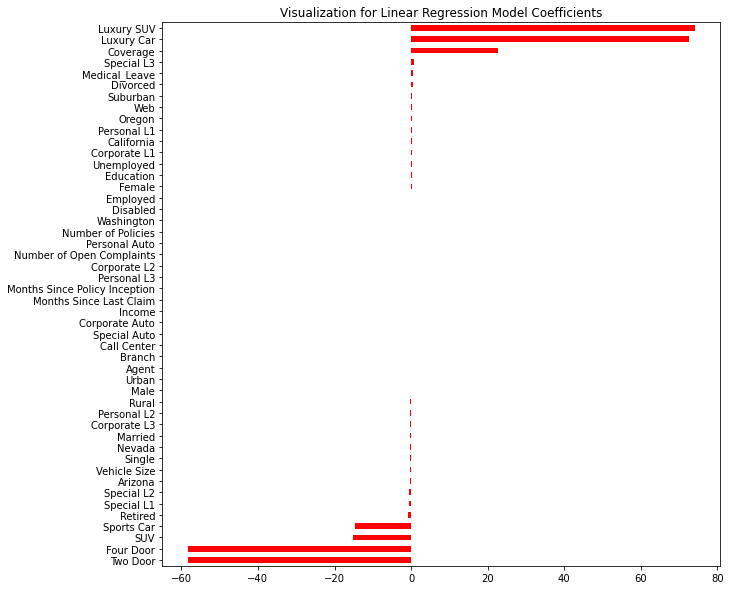

In [28]:
# Visualization for Linear Regression model.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

lrGraph.sort_values().plot.barh(color='red')

plt.title('Visualization for Linear Regression Model Coefficients')